# Converting Stellar Images to Sound

## Visible Light Spectrum

![Visible Light](https://smd-cms.nasa.gov/wp-content/uploads/2023/04/visible_wave-jpg.webp)  

#### Source: NASA

In [2]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages")

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

Image Analysing

In [4]:
img = cv2.imread("Stellar Forge.jpeg", cv2.IMREAD_UNCHANGED) # cv2.imread(path, flag) default_flag = cv2.IMREAD_COLOR
#img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
print(img.shape) # rows, columns, channels (BGR = 3, Greyscale = None)
print(img.size)

(1204, 1280, 3)
4623360


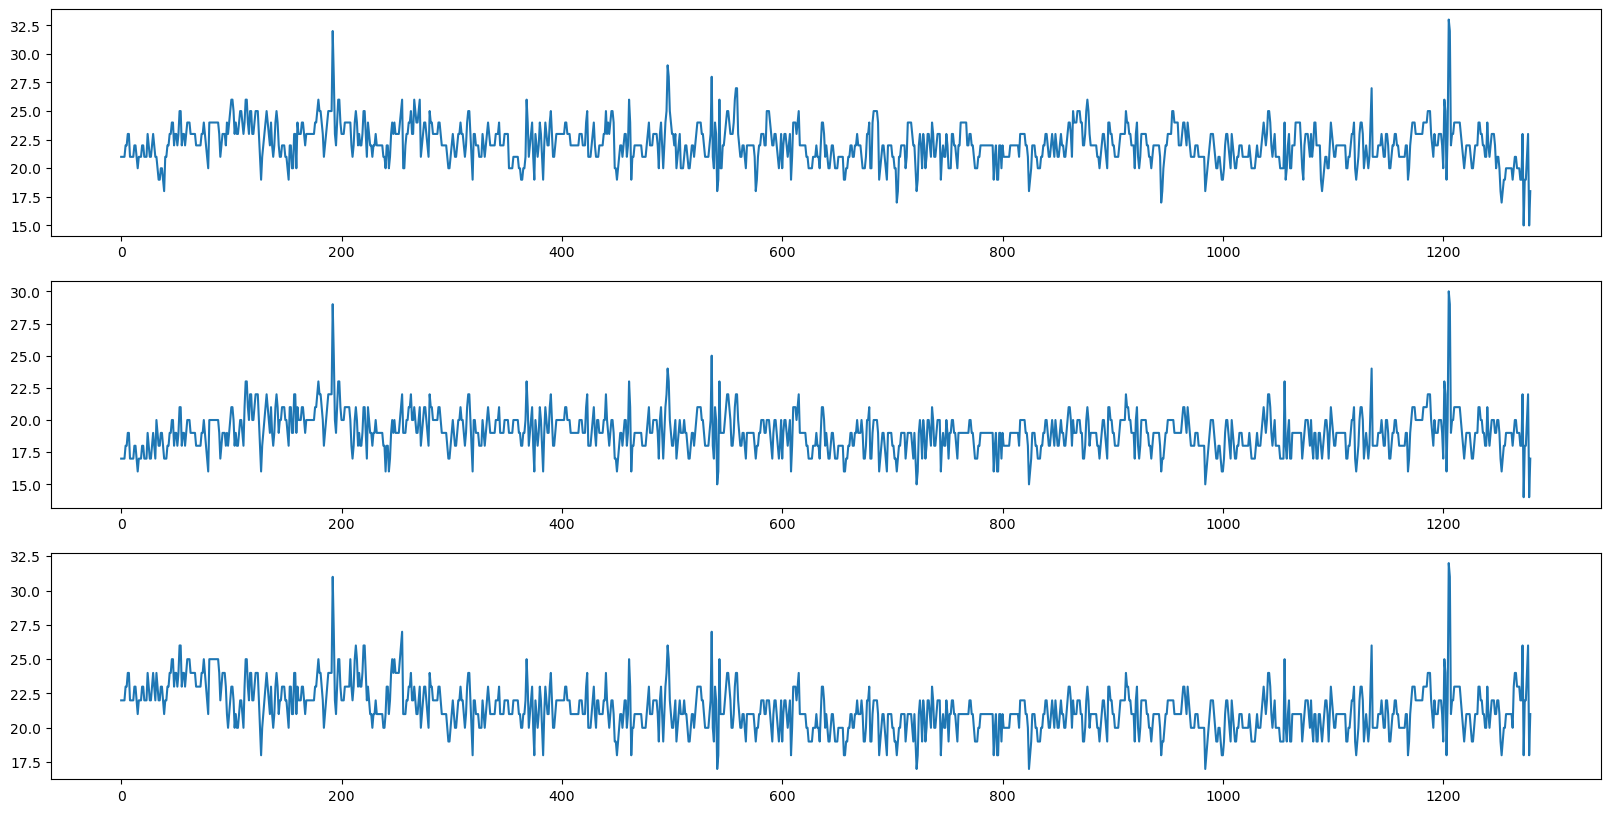

In [5]:
# Splitting colours into BGR 

xpoints = np.arange(0, img.shape[1], 1, dtype=int) #img.shape[0]*img.shape[1]

yBlue = img[:, :, 0]
yGreen = img[:, :, 1]
yRed = img[:, :, 2]

plt.figure(figsize=(20,10))

plt.subplot(3,1,1) # row = 1, col = 3, 1st position plt.plot(xpoints, yBlue[0:10000])
plt.plot(xpoints, yBlue[0])

plt.subplot(3,1,2) # row = 1, col = 3, 2nd position plt.plot(xpoints, yGreen[0:10000])
plt.plot(xpoints, yGreen[0])

plt.subplot(3,1,3) # row = 1, col = 3, 3rd position plt.plot(xpoints, yRed[0:10000])
plt.plot(xpoints, yRed[0])

plt.show()

In [6]:
# get RGB colours and map them with frequencies
# assume that 0 represent 400 nm (the minimum wavelength of visible light) and 255 represent 700 nm (the maximum 
# wavelength of visible light)
# frequency = speed / wavelength

# Visible spectrum (400nm - 780nm)
# Violet: 400 - 420 nm.
# Indigo: 420 - 440 nm.
# Blue: 440 - 490 nm.
# Green: 490 - 570 nm.
# Yellow: 570 - 585 nm.
# Orange: 585 - 620 nm.
# Red: 620 - 780 nm.

# RGB = 0 - 255

speed_of_light = 3* pow(10,8)

'''blueFrequencies = np.array([speed_of_light/ (((380 * pow(10, -9) * yBlue[i])/ 255) + 400* pow(10, -9)) if ((300 * pow(10, -9) * yBlue[i])/255).all() != 0 
                  else np.array([0.0]*yBlue[i]) for i in range(0,len(yBlue))])

greenFrequencies = np.array([speed_of_light/ (((380 * pow(10, -9) * yGreen[i])/ 255) + 400* pow(10, -9)) if ((300 * pow(10, -9) * yGreen[i])/255).all() != 0 
                  else np.array([0.0]*yGreen[i]) for i in range(0,len(yGreen))])

redFrequencies = np.array([speed_of_light/ (((380 * pow(10, -9) * yRed[i])/ 255) + 400* pow(10, -9)) if ((300 * pow(10, -9) * yRed[i])/255).all() != 0 
                  else np.array([0.0]*yRed[i]) for i in range(0,len(yGreen))]) '''

blueFrequencies = np.array([speed_of_light/ (((90* pow(10, -9)* yBlue[i])/255) + 440* pow(10, -9)) if ((300 * pow(10, -9) * yBlue[i])/255).all() != 0 
                  else np.array([0.0]*yBlue[i]) for i in range(0,len(yBlue))])

greenFrequencies = np.array([speed_of_light/ (((95* pow(10, -9)* yGreen[i])/255) + 490* pow(10, -9)) if ((300 * pow(10, -9) * yGreen[i])/255).all() != 0 
                  else np.array([0.0]*yGreen[i]) for i in range(0,len(yGreen))])

redFrequencies = np.array([speed_of_light/ (((210* pow(10, -9)* yRed[i])/ 255) + 520* pow(10, -9)) if ((300 * pow(10, -9) * yRed[i])/255).all() != 0 
                  else np.array([0.0]*yRed[i]) for i in range(0,len(yGreen))])

print(type(blueFrequencies), blueFrequencies.shape, blueFrequencies[0][0])
print(type(greenFrequencies), greenFrequencies.shape, greenFrequencies[0][0])
print(type(redFrequencies), redFrequencies.shape, redFrequencies[0][0])


<class 'numpy.ndarray'> (1204, 1280) 670523271101761.8
<class 'numpy.ndarray'> (1204, 1280) 604432505036937.4
<class 'numpy.ndarray'> (1204, 1280) 557498906864888.5


In [7]:
# Map calculated frequencies to the range of ochestral instruments
# Ochestral frequencies 29.1 Hz (Contra Basoon) - 3322.4 Hz (Harp)

# Violin G3(196.0 Hz) E7(2637.0 Hz) : Blue
# Viola C3(130.8 Hz) C6(1046.5 Hz) : Green
# Cello C2(65.4 Hz) E5(659.3 Hz) : Red

minBlue = np.min(blueFrequencies)
maxBlue = np.max(blueFrequencies)
minGreen = np.min(greenFrequencies)
maxGreen = np.max(greenFrequencies)
minRed = np.min(redFrequencies)
maxRed = np.max(redFrequencies)

blueFrequencies = np.array([(((blueFrequencies[i] - minBlue)*(2637.0 - 196.0)) / (maxBlue - minBlue)) + 196.0 for i in range(len(blueFrequencies))])
greenFrequencies = np.array([(((greenFrequencies[i] - minGreen)*(1046.5 - 130.8)) / (maxGreen - minGreen)) + 130.8 for i in range(len(greenFrequencies))])
redFrequencies = np.array([(((redFrequencies[i] - minRed)*(659.3 - 65.4)) / (maxRed - minRed)) + 65.4 for i in range(len(redFrequencies))])

print(minBlue, maxBlue)
print(minGreen, maxGreen)   
print(minRed, maxRed)   

566037735849056.6 680181381701787.1
512820512820512.7 611779759286656.8
0.0 570597449093757.0


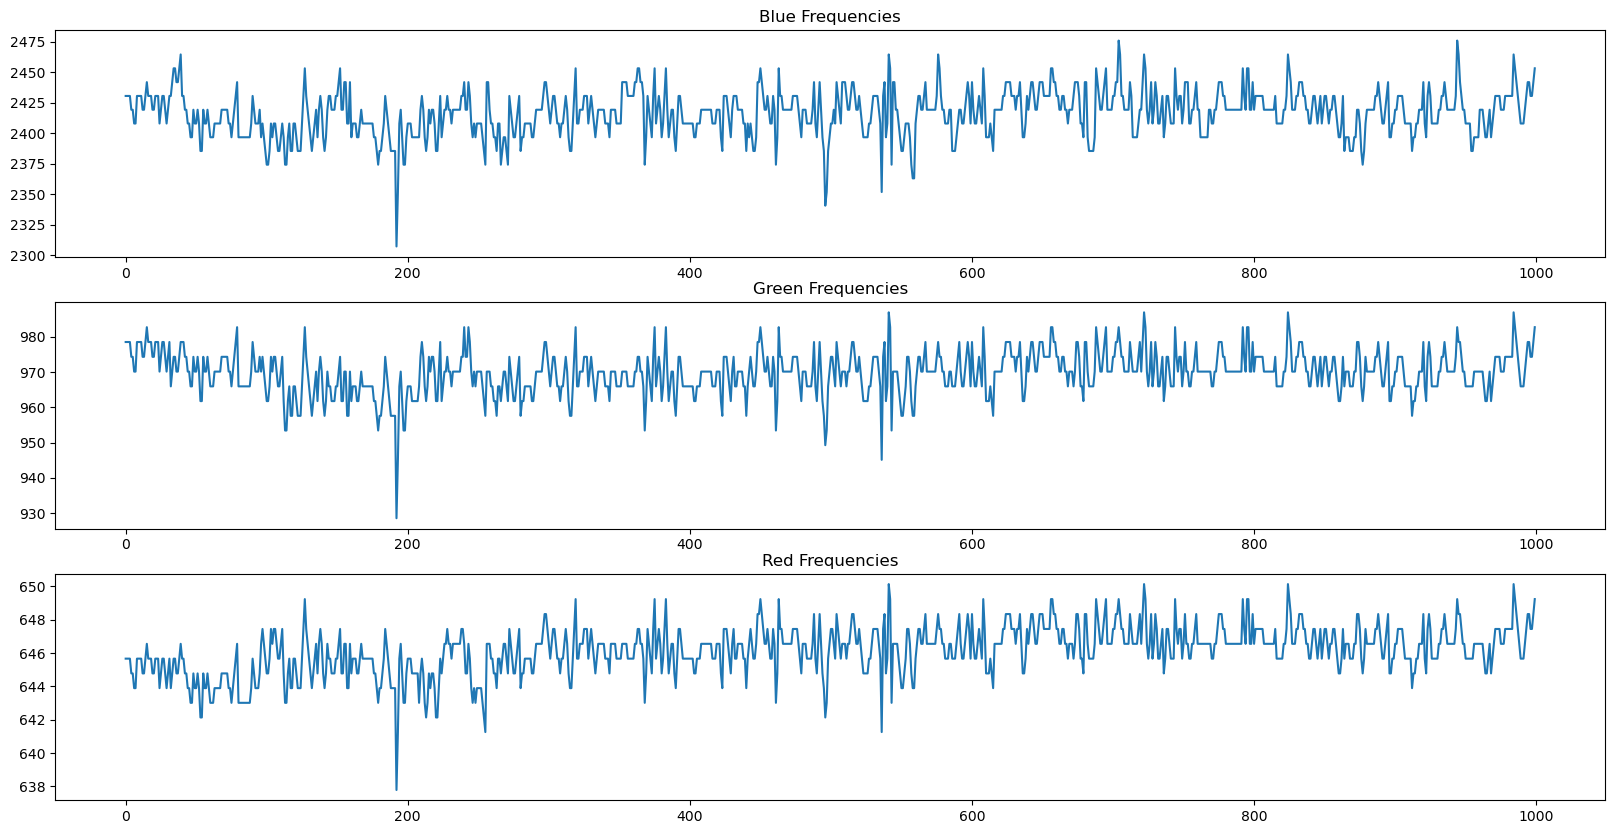

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.plot(blueFrequencies[0][0:1000])
plt.subplot(3,1,1).set_title("Blue Frequencies")

plt.subplot(3,1,2)
plt.plot(greenFrequencies[0][0:1000])
plt.subplot(3,1,2).set_title("Green Frequencies")

plt.subplot(3,1,3)
plt.plot(redFrequencies[0][0:1000])
plt.subplot(3,1,3).set_title("Red Frequencies")

plt.show()

Audio Processing

In [9]:
SAMPLE_RATE = 44100 # 1 second is divided into 44100 parts
AMPLITUDE = 4096

In [10]:
def get_wave(frequency, duration = 0.5):
    t = np.linspace(0, duration, int(SAMPLE_RATE*duration))
    wave = AMPLITUDE * np.sin(2* np.pi* frequency* t) # A sin(2*pi*f*t)
    return wave

In [11]:
# Making waves based of BGR Frequencies

blueWave1 = []
greenWave1 = []
redWave1 = []

time = (img.shape[0]/img.shape[1])/8

for i in range(0, img.shape[0]):
    blueWave1.append(get_wave(sum(blueFrequencies[i])/ blueFrequencies.shape[0], time))

for i in range(0, img.shape[0]):
    greenWave1.append(get_wave(sum(greenFrequencies[i])/ greenFrequencies.shape[0], time))
    
for i in range(0, img.shape[0]):    
    redWave1.append(get_wave(sum(redFrequencies[i])/ redFrequencies.shape[0], time))
    
blueWave1 = np.concatenate(np.array(blueWave1))
greenWave1 = np.concatenate(np.array(greenWave1))
redWave1 = np.concatenate(np.array(redWave1))

In [12]:
# Equating the dimensions of Waves to form a combined wave

waves = [blueWave1, greenWave1, redWave1] #[blueWave1, blueWave2, greenWave1, greenWave2, redWave1, redWave2]
maxCols = max(wave.shape[0] for wave in waves)

blueWave1 = np.hstack((blueWave1, np.zeros(maxCols - blueWave1.shape[0])))
greenWave1 = np.hstack((greenWave1, np.zeros(maxCols - greenWave1.shape[0])))
redWave1 = np.hstack((redWave1, np.zeros(maxCols - redWave1.shape[0])))
     
combinedWave = blueWave1 + greenWave1 + redWave1 
combinedWave = combinedWave * (16300/np.max(combinedWave)) # Adjusting the Amplitude 

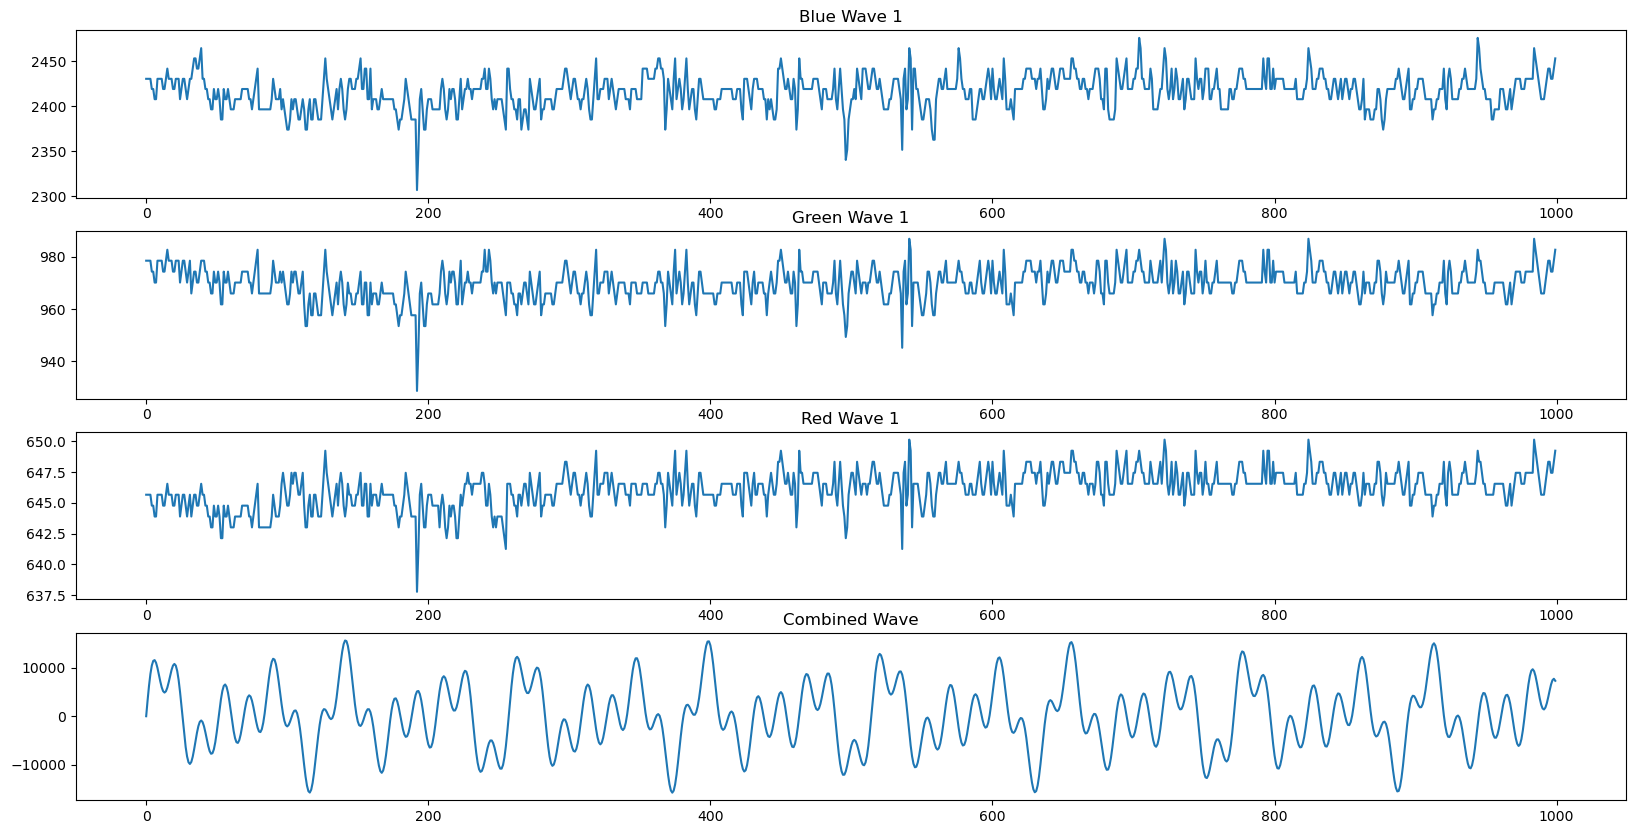

In [13]:
# Plotting the generated waves

plt.figure(figsize=(20,10))

plt.subplot(4,1,1)
plt.plot(blueFrequencies[0][0: 1000])
plt.subplot(4,1,1).set_title("Blue Wave 1")

plt.subplot(4,1,2)
plt.plot(greenFrequencies[0][0:1000])
plt.subplot(4,1,2).set_title("Green Wave 1")

plt.subplot(4,1,3)
plt.plot(redFrequencies[0][0:1000])
plt.subplot(4,1,3).set_title("Red Wave 1")

plt.subplot(4,1,4)
plt.plot(combinedWave[0:1000])
plt.subplot(4,1,4).set_title("Combined Wave")

plt.show()

In [14]:
# Convert combined wave back to min and max values of the string trio (65.4 Hz - 2637.0 Hz)
minCombined = np.min(combinedWave)
maxCombined = np.max(combinedWave)

for i in range(len(combinedWave)):
    combinedWave[i] = (((combinedWave[i] - minCombined)*(2637.0 - 65.4))/(maxCombined-minCombined)) + 65.4

In [15]:
# Creating the audio file

wavfile.write('photo.wav', SAMPLE_RATE, combinedWave.astype(np.int16))